In [38]:
import tarfile
import os
import regex
import matplotlib.pyplot as plt
import functools
import numpy as np


wczytanie danych

In [8]:
bills = tarfile.open('ustawy.tar.gz')
bills.extractall('./bills')
bills.close()
bills_files = os.listdir('./bills')

### zad 1

zdefiniowanie wyrażeń regularnych odpowiednich do znalezienia konkretnych poprawek

In [40]:
ADDITION_REGEX = r'dodaje się (art|pkt|lit|ust|§)'
REMOVAL_REGEX = r'(skreśla się (pkt|art|ust|lit|§))|([0-9]+[a-z]? skreśla się)'
CHANGE_REGEX = r'(pkt|art\.|ust\.|§|lit\.) ([0-9]*[a-z]?( | i |, |-))+otrzymuj(e|ą) brzmienie'

zliczanie wystąpień dla kolejnych ustaw

In [49]:
additions = {}
removals = {}
changes = {}

In [50]:
for file_name in bills_files:
    bill = open("bills/" + file_name, "r", encoding="utf8")
    text = functools.reduce(lambda a,b: a + b, bill.readlines())
    year = file_name.split('_')[0]
    if file_name in additions:
        additions[file_name] += len(regex.findall(ADDITION_REGEX, text))
    else:
        additions[file_name] = len(regex.findall(ADDITION_REGEX, text))
    if file_name in removals:
        removals[file_name] += len(regex.findall(REMOVAL_REGEX, text))
    else:
        removals[file_name] = len(regex.findall(REMOVAL_REGEX, text))
    if file_name in changes:
        changes[file_name] += len(regex.findall(CHANGE_REGEX, text))
    else:
        changes[file_name] = len(regex.findall(CHANGE_REGEX, text))

liczba dodań jednostki dla każdej ustawy

In [51]:
additions

{'1993_599.txt': 10,
 '1993_602.txt': 1,
 '1993_645.txt': 0,
 '1993_646.txt': 21,
 '1994_150.txt': 0,
 '1994_195.txt': 1,
 '1994_201.txt': 1,
 '1994_214.txt': 0,
 '1994_215.txt': 1,
 '1994_288.txt': 0,
 '1994_294.txt': 0,
 '1994_331.txt': 1,
 '1994_332.txt': 1,
 '1994_344.txt': 0,
 '1994_362.txt': 1,
 '1994_363.txt': 0,
 '1994_368.txt': 8,
 '1994_369.txt': 2,
 '1994_37.txt': 3,
 '1994_384.txt': 2,
 '1994_385.txt': 1,
 '1994_395.txt': 0,
 '1994_396.txt': 1,
 '1994_419.txt': 13,
 '1994_472.txt': 4,
 '1994_473.txt': 3,
 '1994_516.txt': 5,
 '1994_536.txt': 5,
 '1994_591.txt': 2,
 '1994_592.txt': 0,
 '1994_600.txt': 3,
 '1994_601.txt': 1,
 '1994_602.txt': 0,
 '1994_615.txt': 7,
 '1994_627.txt': 8,
 '1994_645.txt': 0,
 '1994_669.txt': 4,
 '1994_670.txt': 11,
 '1994_704.txt': 11,
 '1994_97.txt': 0,
 '1995_1.txt': 0,
 '1995_121.txt': 0,
 '1995_141.txt': 0,
 '1995_143.txt': 0,
 '1995_152.txt': 0,
 '1995_164.txt': 0,
 '1995_184.txt': 0,
 '1995_2.txt': 5,
 '1995_208.txt': 9,
 '1995_221.txt': 2,
 

liczba usunięć jednostki dla każdej ustawy

In [52]:
removals

{'1993_599.txt': 4,
 '1993_602.txt': 2,
 '1993_645.txt': 1,
 '1993_646.txt': 10,
 '1994_150.txt': 1,
 '1994_195.txt': 1,
 '1994_201.txt': 0,
 '1994_214.txt': 0,
 '1994_215.txt': 0,
 '1994_288.txt': 0,
 '1994_294.txt': 0,
 '1994_331.txt': 0,
 '1994_332.txt': 0,
 '1994_344.txt': 1,
 '1994_362.txt': 0,
 '1994_363.txt': 0,
 '1994_368.txt': 3,
 '1994_369.txt': 1,
 '1994_37.txt': 1,
 '1994_384.txt': 0,
 '1994_385.txt': 0,
 '1994_395.txt': 0,
 '1994_396.txt': 0,
 '1994_419.txt': 16,
 '1994_472.txt': 1,
 '1994_473.txt': 0,
 '1994_516.txt': 1,
 '1994_536.txt': 11,
 '1994_591.txt': 0,
 '1994_592.txt': 0,
 '1994_600.txt': 0,
 '1994_601.txt': 0,
 '1994_602.txt': 0,
 '1994_615.txt': 2,
 '1994_627.txt': 3,
 '1994_645.txt': 0,
 '1994_669.txt': 0,
 '1994_670.txt': 2,
 '1994_704.txt': 5,
 '1994_97.txt': 0,
 '1995_1.txt': 2,
 '1995_121.txt': 2,
 '1995_141.txt': 0,
 '1995_143.txt': 0,
 '1995_152.txt': 0,
 '1995_164.txt': 0,
 '1995_184.txt': 1,
 '1995_2.txt': 2,
 '1995_208.txt': 3,
 '1995_221.txt': 0,
 '1

liczba zmian jednostki dla każdej ustawy

In [53]:
changes

{'1993_599.txt': 17,
 '1993_602.txt': 8,
 '1993_645.txt': 0,
 '1993_646.txt': 35,
 '1994_150.txt': 1,
 '1994_195.txt': 1,
 '1994_201.txt': 0,
 '1994_214.txt': 0,
 '1994_215.txt': 2,
 '1994_288.txt': 0,
 '1994_294.txt': 0,
 '1994_331.txt': 1,
 '1994_332.txt': 1,
 '1994_344.txt': 3,
 '1994_362.txt': 0,
 '1994_363.txt': 0,
 '1994_368.txt': 32,
 '1994_369.txt': 3,
 '1994_37.txt': 1,
 '1994_384.txt': 0,
 '1994_385.txt': 0,
 '1994_395.txt': 0,
 '1994_396.txt': 0,
 '1994_419.txt': 58,
 '1994_472.txt': 2,
 '1994_473.txt': 0,
 '1994_516.txt': 4,
 '1994_536.txt': 21,
 '1994_591.txt': 1,
 '1994_592.txt': 0,
 '1994_600.txt': 0,
 '1994_601.txt': 0,
 '1994_602.txt': 0,
 '1994_615.txt': 23,
 '1994_627.txt': 1,
 '1994_645.txt': 1,
 '1994_669.txt': 1,
 '1994_670.txt': 8,
 '1994_704.txt': 10,
 '1994_97.txt': 0,
 '1995_1.txt': 0,
 '1995_121.txt': 1,
 '1995_141.txt': 1,
 '1995_143.txt': 0,
 '1995_152.txt': 0,
 '1995_164.txt': 0,
 '1995_184.txt': 2,
 '1995_2.txt': 2,
 '1995_208.txt': 4,
 '1995_221.txt': 0,

In [99]:
n_additions = sum(list(additions.values()))
n_removals = sum(list(removals.values()))
n_changes = sum(list(changes.values()))

print('Number of additions: {}'.format(n_additions))
print('Number of removals: {}'.format(n_removals))
print('Number of changes: {}'.format(n_changes))

Number of additions: 5811
Number of removals: 2312
Number of changes: 8262


### zad 3

In [73]:
additions = {}
removals = {}
changes = {}

In [74]:
for file_name in bills_files:
    bill = open("bills/" + file_name, "r", encoding="utf8")
    text = functools.reduce(lambda a,b: a + b, bill.readlines())
    year = file_name.split('_')[0]
    if year in additions:
        additions[year] += len(regex.findall(ADDITION_REGEX, text))
    else:
        additions[year] = len(regex.findall(ADDITION_REGEX, text))
    if year in removals:
        removals[year] += len(regex.findall(REMOVAL_REGEX, text))
    else:
        removals[year] = len(regex.findall(REMOVAL_REGEX, text))
    if year in changes:
        changes[year] += len(regex.findall(CHANGE_REGEX, text))
    else:
        changes[year] = len(regex.findall(CHANGE_REGEX, text))

In [75]:
removals

{'1993': 17,
 '1994': 49,
 '1995': 143,
 '1996': 360,
 '1997': 431,
 '1998': 150,
 '1999': 90,
 '2000': 550,
 '2001': 446,
 '2002': 4,
 '2003': 56,
 '2004': 16}

In [86]:
years = list(additions.keys())
n_additions = list(additions.values())
n_removals = list(removals.values())
n_changes = list(changes.values())
n_unit = [n_additions[i]+n_removals[i]+n_changes[i] for i in range(len(years))]
addictions_percent = [n_additions[i]*100/n_unit[i] for i in range(len(years))]
removals_percent = [n_removals[i]*100/n_unit[i] for i in range(len(years))]
changes_percent = [n_changes[i]*100/n_unit[i] for i in range(len(years))]

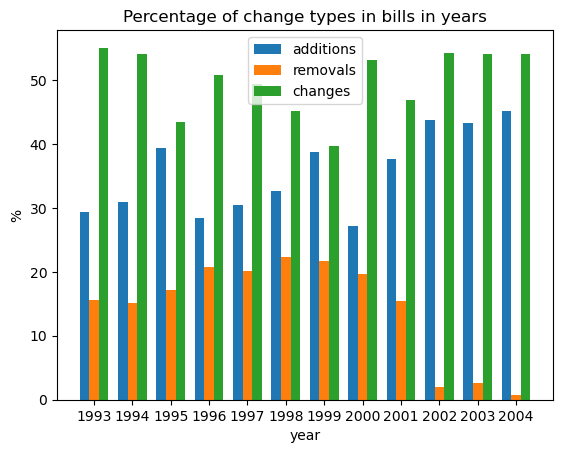

In [97]:
x = np.arange(len(years))
plt.bar(x-0.25, addictions_percent, width = 0.25, label="additions")
plt.bar(x, removals_percent, width = 0.25, label="removals")
plt.bar(x+0.25, changes_percent, width = 0.25, label="changes")
plt.xticks(x, years)
plt.legend()
plt.title("Percentage of change types in bills in years")
plt.ylabel('%')
plt.xlabel('year')
plt.show()

w danych ustawach występuje najwięcej zmian, natomiast najmniej usunięć

### zad. 4, 5, 6

zdefiniowanie wyrażenia regularnego umożliwiającego obliczenie łącznej liczby wystąpień słowa ustawa w każdej formie fleksyjnej i ortograficznej, z wyłączeniem innych słów z tym samym przedrostkiem

In [114]:
REGEX_Z4 = r"(?i)\bustaw(?:a|y|ie|ę|ą|o|om|ami|ach|)\b"

wyrazenia regularne do dwóch kolejnych zadań

In [112]:
REGEX_Z5 = r"(?i)\bustaw(?:a|y|ie|ę|ą|o|om|ami|ach|)\b z dnia"
REGEX_Z6 = r"(?i)\bustaw(?:a|y|ie|ę|ą|o|om|ami|ach|)\b(?! z dnia)"

In [115]:
n_z4 = 0
n_z5 = 0
n_z6 = 0

for file_name in bills_files:
    bill = open("bills/" + file_name, "r", encoding="utf8")
    text = functools.reduce(lambda a,b: a + b, bill.readlines())
    n_z4 += len(regex.findall(REGEX_Z4, text))
    n_z5 += len(regex.findall(REGEX_Z5, text))
    n_z6 += len(regex.findall(REGEX_Z6, text))


In [116]:
print('Zad.4 liczba wystąpień: {}'.format(n_z4))
print('Zad.5 liczba wystąpień: {}'.format(n_z5))
print('Zad.6 liczba wystąpień: {}'.format(n_z6))

Zad.4 liczba wystąpień: 24934
Zad.5 liczba wystąpień: 6935
Zad.6 liczba wystąpień: 17999


sprawdzenie poprawności

In [117]:
n_z4 == n_z5 + n_z6

True

### zad 7

zdefiniowanie wyrażenia regularnego umożliwiającego obliczenie łącznej liczby wystąpień słowa ustawa w dowolnej formie fleksyjnej, z wyłączeniem wystąpień po wyrażeniu o zmianie

In [118]:
REGEX_Z7 = r"(?i)(?<!o zmianie )\bustaw(?:a|y|ie|ę|ą|o|om|ami|ach|)\b"

In [120]:
n_z7 = 0

for file_name in bills_files:
    bill = open("bills/" + file_name, "r", encoding="utf8")
    text = functools.reduce(lambda a,b: a + b, bill.readlines())
    n_z7 += len(regex.findall(REGEX_Z7, text))

n_z7

24168

### zad 8

Przedstawienie wyników z zadan 4-7 na wykresie

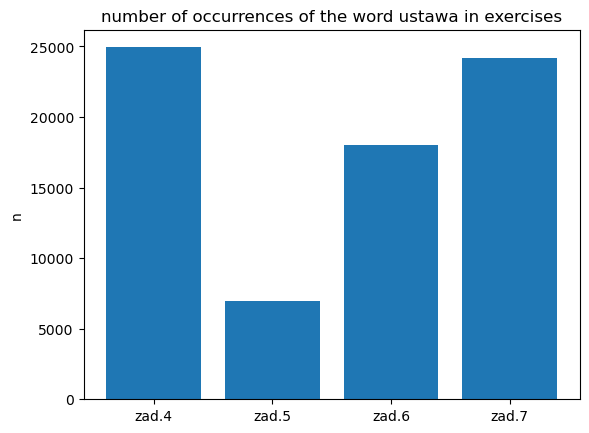

In [123]:
plt.bar(np.arange(4), [n_z4, n_z5, n_z6, n_z7])
plt.xticks(np.arange(4), [f"zad.{n}" for n in range(4, 8)])
plt.title("number of occurrences of the word ustawa in exercises")
plt.ylabel('n')
plt.show()